Importing the required packages

In [96]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt


Importing the image and converting it into binary

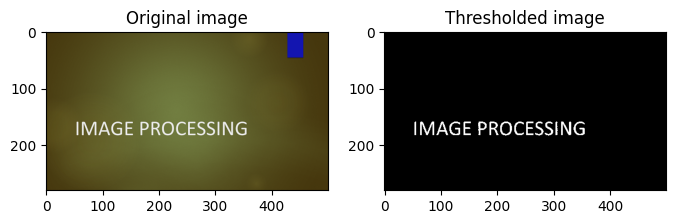

In [97]:
img = cv2.imread("1.png")
image1 = cv2.imread("1.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.uint8)
img_gray = cv2.threshold(img_gray , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1].astype(np.uint8)

plt.figure(1, figsize=(8, 8))
plt.subplot(1, 2, 1), plt.imshow(image1, cmap='gray'), plt.title('Original image')
plt.subplot(1, 2, 2), plt.imshow(img_gray, cmap='gray'), plt.title('Thresholded image')
plt.show()

Creating the mask

In [98]:
a = img.shape [1]
b = img.shape [0]
mask = np.zeros((b,a), np.uint8)

imorting the templates one by one ande matching each template (only fir the letters A, C and M)

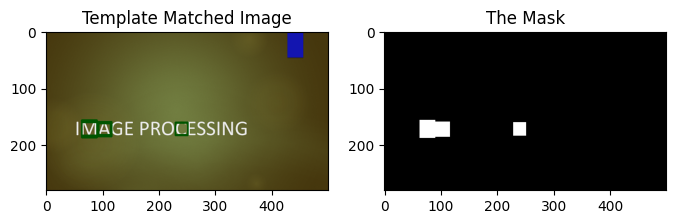

In [99]:
path2 = glob.glob ("./templates/*")
for file in path2:
    
    template1 = cv2.imread (file)
   
    template1 = cv2.cvtColor(template1,cv2.COLOR_BGR2GRAY)
    template1 = cv2.threshold(template1 , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    filename = 'savedImage.jpg'
    '''cv2.imwrite (filename, template1)
    plt.figure(1, figsize=(8, 8))
    plt.subplot(1, 2, 1), plt.imshow(template1, cmap='gray'), plt.title('Template Matched Image')
    plt.show()'''
    
    if b>a:
        template1= cv2.resize(template1, (a, a))
    else:
        template1= cv2.resize(template1, (b, b))
    for scale in np.linspace(0.02,1.0,100)[::-1]:
        
        size = (int(template1.shape[1]*scale),int(template1.shape[0]*scale))
        resized = cv2.resize(template1, size)
        
        w, h=resized.shape[::-1]
    
        if w>20:
            
            res =  cv2.matchTemplate (img_gray, resized, cv2.TM_CCOEFF_NORMED)
            treshold = 0.65
            loc = np.where (res >= treshold)
            if loc:
                for pt in zip(*loc[::-1]):
                    cv2.rectangle(mask, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (255,255,255), -1)
                    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (0,85, 0), 2)

plt.figure(1, figsize=(8, 8))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Template Matched Image')
plt.subplot(1, 2, 2), plt.imshow(mask, cmap='gray'), plt.title('The Mask')
plt.show()

dilating and inpainting

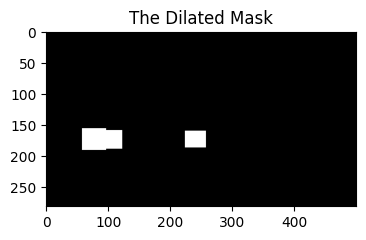

In [100]:
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12,4))
dilate = cv2.dilate(mask, dilate_kernel, iterations=1)

dst = cv2.inpaint(image1, mask, 10, cv2.INPAINT_NS)
dst1 = cv2.inpaint(image1, dilate, 10, cv2.INPAINT_TELEA)

plt.figure(1, figsize=(4, 4))
plt.subplot(1, 1, 1), plt.imshow(dilate, cmap='gray'), plt.title('The Dilated Mask')
plt.show()

showing the results

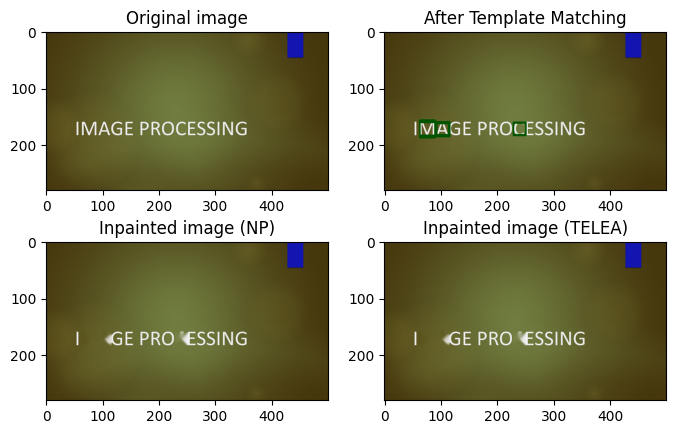

In [101]:
plt.figure(1, figsize=(8, 5))
plt.subplot(2, 2, 1), plt.imshow(image1, cmap='gray'), plt.title('Original image')
plt.subplot(2, 2, 2), plt.imshow(img, cmap='gray'), plt.title('After Template Matching')
#plt.subplot(2, 2, 3), plt.imshow(dilate, cmap='gray'), plt.title('Inpaint mask')
plt.subplot(2, 2, 3), plt.imshow(dst, cmap='gray'), plt.title('Inpainted image (NP)')
plt.subplot(2, 2, 4), plt.imshow(dst, cmap='gray'), plt.title('Inpainted image (TELEA)')
plt.show()